# TP 2

## 1 Classifying digits with Scikit-learn

### 1) Importing and Preparing the Data

In [1]:
from ctypes import sizeof
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import numpy as np

# import dataset
(digits, target) = load_digits(return_X_y=True)
# change labels from 0 to 9, to 0(even) and 1(odd)
y_labels = target % 2
# validation ration, equal to the percentage of points used for train, the rest is used for test
valid_ration = 0.4
# split dataset
XTrain, XTest, yTrain, yTest = train_test_split(digits, y_labels, test_size = valid_ration, random_state=None)
# scale data -> zero mean and unit variance
scaler = StandardScaler()
XTrain = scaler.fit_transform(XTrain)

even_train = sum(yTrain==0)/len(yTrain)
odd_train = sum(yTrain==1)/len(yTrain)
print("Proportion of even training samples and odd training samples :", even_train, odd_train)
even_test = sum(yTest==0)/len(yTest)
odd_test = sum(yTest==1)/len(yTest)
print("Proportion of even test samples and odd training samples :", even_test%4, odd_test)
print("Size of training set and test set : ",len(XTrain),len(XTest))

Proportion of even training samples and odd training samples : 0.48794063079777367 0.5120593692022264
Proportion of even test samples and odd training samples : 0.5076495132127955 0.49235048678720444
Size of training set and test set :  1078 719


### 2) Logistic Regression 

Test score with  l1  penalty: 0.8887
Best parameter found on development set:  {'C': 0.2682695795279725}
Best score found on development set:  0.9244444444444444
Best estimator found on development set:  LogisticRegression(C=0.2682695795279725, max_iter=1000, penalty='l1',
                   solver='liblinear')
Test score with  l2  penalty: 0.8873
Best parameter found on development set:  {'C': 0.040949150623804234}
Best score found on development set:  0.9237037037037037
Best estimator found on development set:  LogisticRegression(C=0.040949150623804234, max_iter=1000, solver='liblinear')


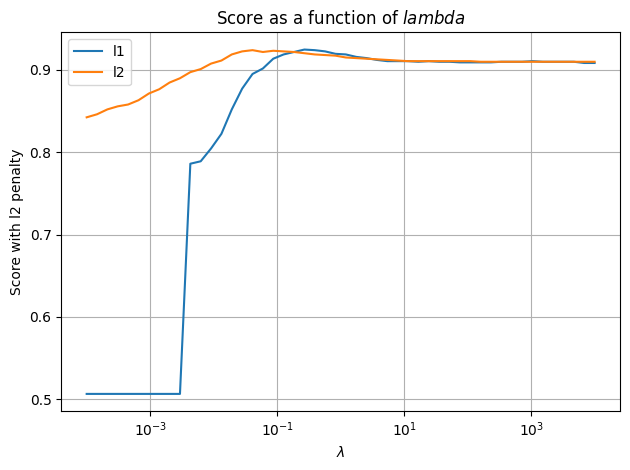

In [2]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

penalty = ['l1','l2']

for pen in penalty:
    # classifier training
    LogRegClassifier = LogisticRegression(penalty=pen, solver='liblinear', C=1.0, max_iter=1000)

    # CV on the regularization constant (= Lambda in the ex)
    parameters = [{'C' : np.logspace(-4, 4, 50)}]
    cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=1)
    clf = GridSearchCV(LogRegClassifier,parameters, cv = cv)

    # fit data
    clf.fit(XTrain,yTrain)

    # compute accuracy
    score = clf.score(XTest, yTest)
    print("Test score with ",pen , " penalty: %.4f" % score)
    print("Best parameter found on development set: ", clf.best_params_)
    print("Best score found on development set: ", clf.best_score_)
    print("Best estimator found on development set: ", clf.best_estimator_)
    
    # plot the score as a function of Lambda
    plt.semilogx(clf.cv_results_['param_C'].data, clf.cv_results_['mean_test_score'])
    
    plt.xlabel('$\lambda$')
    plt.ylabel(f'Score with {pen} penalty')
    plt.title('Score as a function of $lambda$')
plt.legend(penalty)
plt.grid()
plt.tight_layout()
plt.show()



### 3) Ridge and Hinge

#### Ridge Regression

Ridge Regression Test accuracy: 0.9026


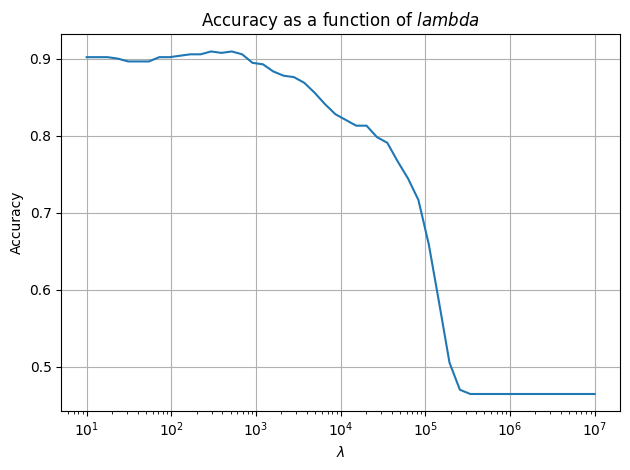

In [3]:
from sklearn.linear_model import RidgeClassifier

RidgeRegClassifier = RidgeClassifier()

# CV on the regularization constant (= Lambda in the ex)
parameters = [{'alpha' : np.logspace(1, 7)}]
cv = ShuffleSplit(n_splits=5, random_state=1)
clf = GridSearchCV(RidgeRegClassifier,parameters, cv = cv)
clf.fit(XTrain,yTrain)

# compute accuracy
score = clf.score(XTest, yTest)
print("Ridge Regression Test accuracy: %.4f" % score)


#plot the score as a function of Lambda
plt.semilogx(clf.cv_results_['param_alpha'].data, clf.cv_results_['mean_test_score'])
plt.xlabel('$\lambda$')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of $lambda$')
plt.grid()
plt.tight_layout()
plt.show()


#### SVM/Hinge 

SVM/Hinge Regression Test accuracy with L1 penalty: 0.9026 and L2 penalty: 0.9026
Best parameter found on development set for l1 and l2 respectively:  0.046415888336127774 0.046415888336127774


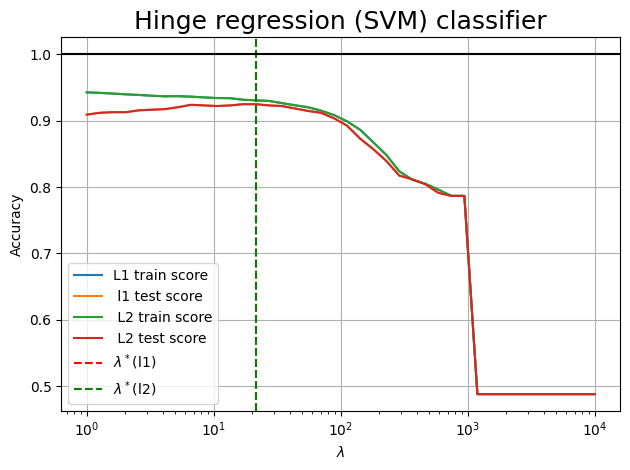

In [4]:
from sklearn.svm import LinearSVC

# removes the non convergeance warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


SVMRegClassifierL1 = LinearSVC(penalty='l1',max_iter=1000,C=1, dual=False)
SVMRegClassifierL2 = LinearSVC(penalty='l2',max_iter=1000,C=1,tol=0.1)
C_array = np.logspace(-4, 0,40)
parameters = [ {'C':  C_array} ]

clf1 = GridSearchCV(estimator = SVMRegClassifierL1, param_grid = parameters, return_train_score=True)
clf2 = GridSearchCV(estimator = SVMRegClassifierL1, param_grid = parameters, return_train_score=True)
clf1.fit(XTrain,yTrain)
clf2.fit(XTrain,yTrain)

    
score1 = clf.score(XTest, yTest)
score2 = clf.score(XTest, yTest)

print("SVM/Hinge Regression Test accuracy with L1 penalty: {:.4f} and L2 penalty: {:.4f}".format(score1,score2))

optimalC1 = clf1.cv_results_['param_C'][clf1.best_index_]
optimalC2 = clf2.cv_results_['param_C'][clf2.best_index_]
optimalH1 = clf1.best_estimator_
optimalH2 = clf2.best_estimator_

print("Best parameter found on development set for l1 and l2 respectively: ", optimalC1, optimalC2)
#train scores
train_scoreH1 = clf1.cv_results_['mean_train_score'] 
test_scoreH1 = clf1.cv_results_['mean_test_score']   
train_scoreH2 = clf2.cv_results_['mean_train_score'] 
test_scoreH2 = clf2.cv_results_['mean_test_score']   

#plot everything
plt.title('Hinge regression (SVM) classifier', fontsize=18)
plt.plot([1/i for i in C_array], train_scoreH1, label='L1 train score')
plt.plot([1/i for i in C_array], test_scoreH1, label=' l1 test score')
plt.plot([1/i for i in C_array], train_scoreH2, label=' L2 train score')
plt.plot([1/i for i in C_array], test_scoreH2, label=' L2 test score')
plt.xlabel('$\\lambda$')
plt.ylabel('Accuracy')
plt.axvline(1/optimalC1, label='$\\lambda^* $(l1)', linestyle='--', color='r')
plt.axvline(1/optimalC2, label='$\\lambda^* $(l2)', linestyle='--', color='g')
plt.axhline(1, color='k', linestyle='-')
plt.xscale('log')

plt.grid()
plt.tight_layout()
plt.legend(loc='best')
plt.show()



### 4) Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

RandForestClassifier = RandomForestClassifier()

#10E4 takes too much time (more than 60min)
#maybe on google collab it would take less
#10E3 takes 3min30s
parameters = [ {'n_estimators': np.linspace(10,1000, dtype=int)}]

clf = GridSearchCV(estimator = RandForestClassifier, param_grid = parameters, verbose = 1)
clf.fit(XTrain,yTrain)

score = clf.score(XTest, yTest)
print("Random Test score: %.4f" % score)
# plot the score as a function of the number of trees
plt.plot(clf.cv_results_['param_n_estimators'].data, clf.cv_results_['mean_test_score'])
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of the number of trees')
plt.grid()
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits


### 5) Random Feature

Test score with l2 penalty for D =  64 : 0.78303199
Best parameter found on development set for D =  64 :  0.07142860000000001
Test score with l2 penalty for D =  128 : 0.81363004
Best parameter found on development set for D =  128 :  0.08571430000000001
Test score with l2 penalty for D =  256 : 0.80945758
Best parameter found on development set for D =  256 :  0.09183674285714286
Test score with l2 penalty for D =  512 : 0.83171071
Best parameter found on development set for D =  512 :  0.04897964285714286
Test score with l2 penalty for D =  2048 : 0.84005563
Best parameter found on development set for D =  2048 :  0.08367348571428572
Test score with l2 penalty for D =  8192 : 0.86369958
Best parameter found on development set for D =  8192 :  0.06734697142857143


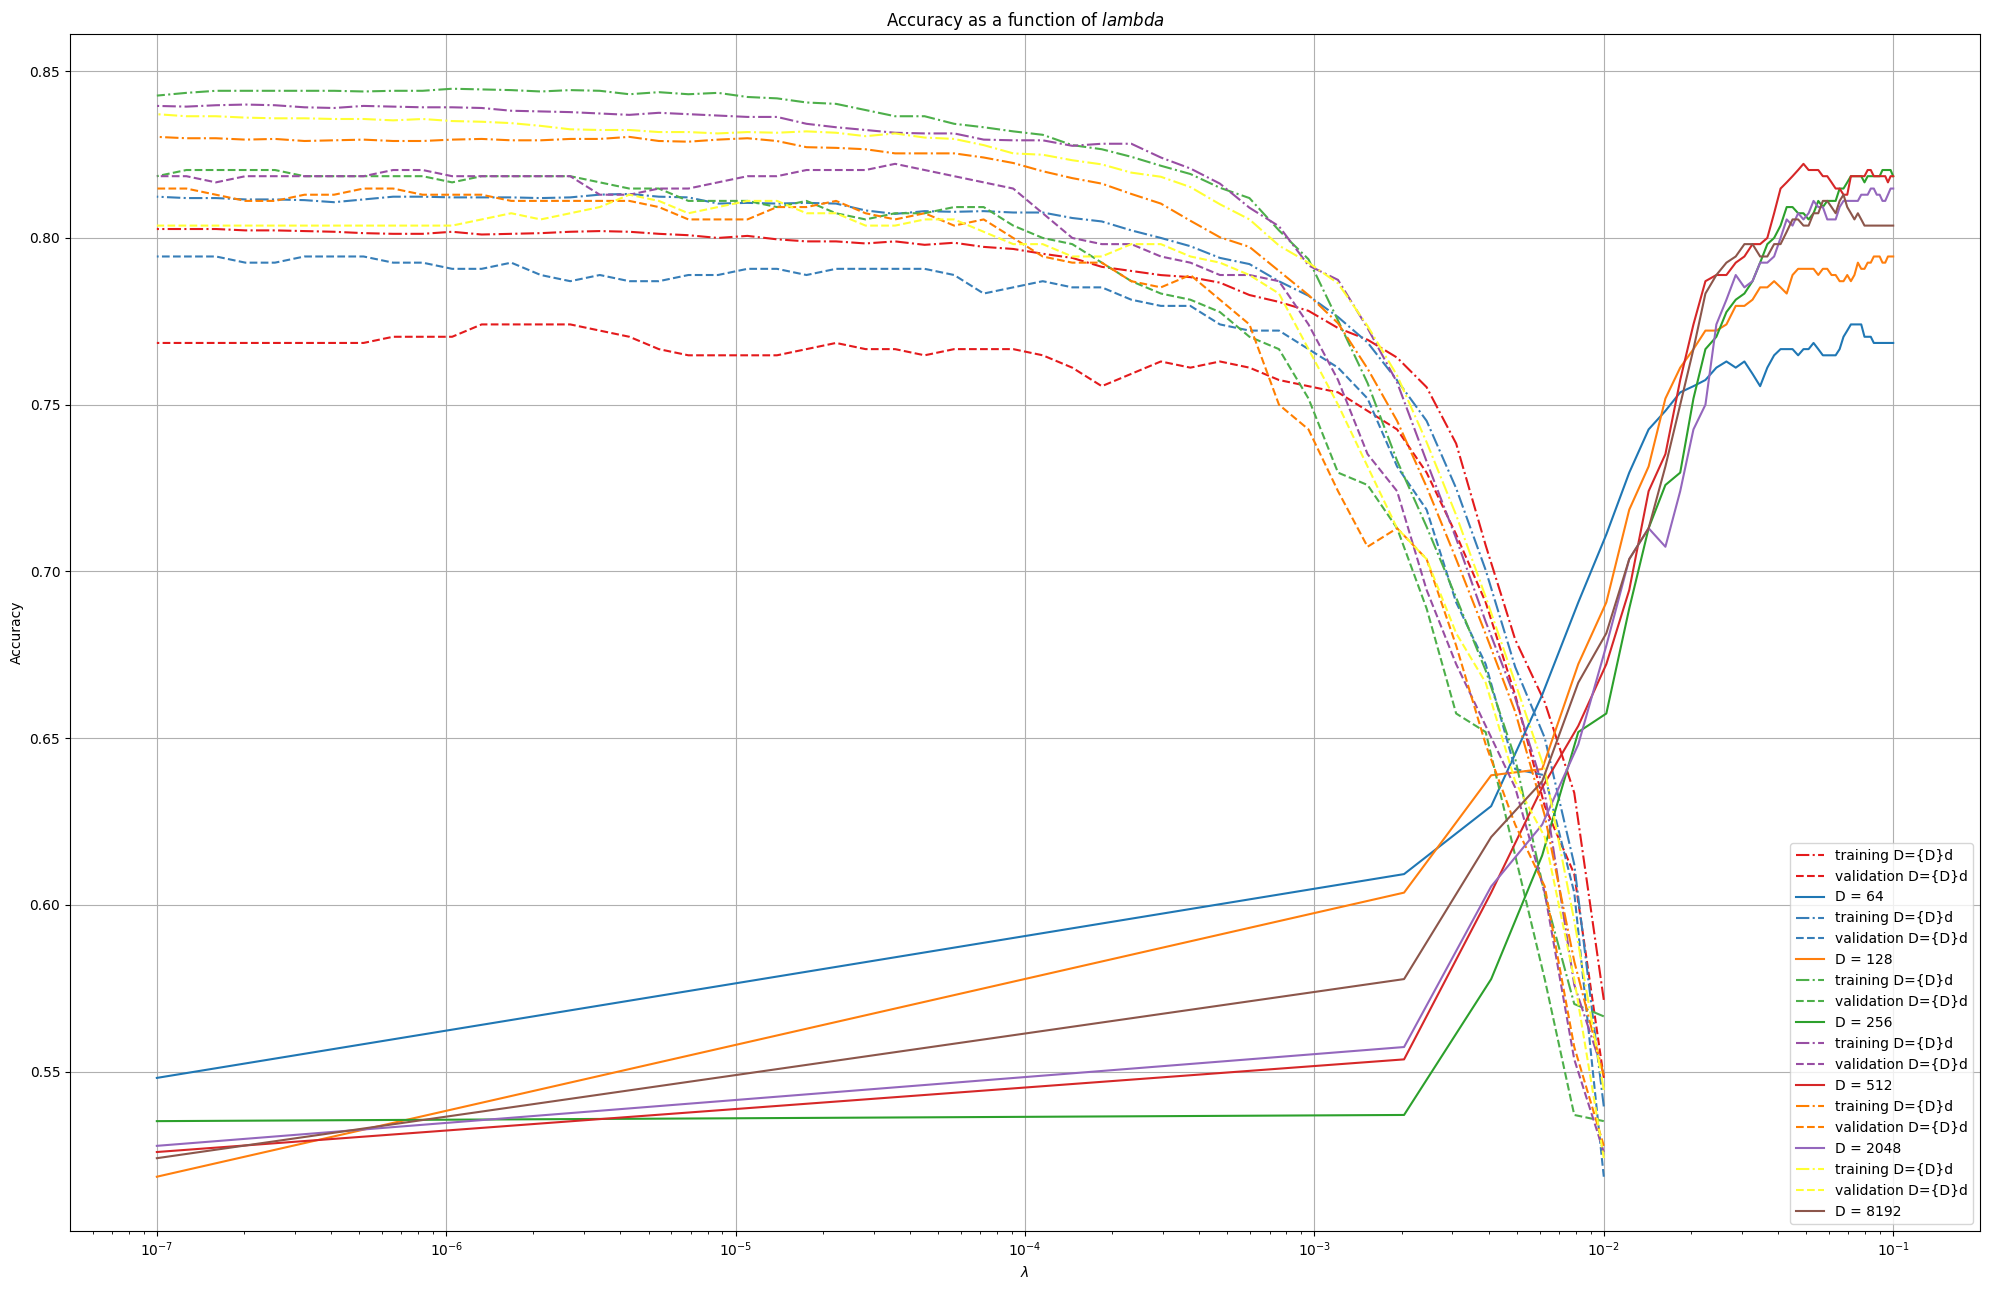

In [ ]:
from sklearn.linear_model import LogisticRegression

# classifier training
LogRegClassifier = LogisticRegression(penalty='l2', solver='liblinear')

# transformation
d = 64
size = 5
Dlist = [d,2*d, 4*d, 8*d, 32*d,128*d]

C_array = np.logspace(2, 7,50)
parameters = [ {'C': C_array} ]
index = 0
plt.figure(figsize=(20,13))
for D in Dlist: 
    F = np.random.normal(scale= 1/np.sqrt(d), size=(D, d))
    UTrain = 1/np.sqrt(D) * 1/(1 + np.exp(-np.matmul(F, np.transpose(XTrain))))
    UTest = 1/np.sqrt(D) * 1/(1 + np.exp(-np.matmul(F, np.transpose(XTest))))
    

    # CV on the regularization constant (= Lambda in the ex)
    parameters = [{'C' : np.linspace(10**(-7), 10**(-1))}]
    cv = ShuffleSplit(n_splits=5, random_state=1)
    clf = GridSearchCV(LogRegClassifier,parameters, cv = cv,  return_train_score=True)
    # fit data
    clf.fit(np.transpose(UTrain),yTrain)

    # compute accuracy
    score= clf.score(np.transpose(UTest), yTest)
    print("Test score with l2 penalty for D = ", D,": %.8f" % score)
    train_score =  clf.cv_results_['mean_train_score']
    test_score =  clf.cv_results_['mean_test_score']
    optimalC = clf.cv_results_['param_C'][clf.best_index_]
    print("Best parameter found on development set for D = ", D,": ", optimalC)
    #plot the score as a function of Lambda
    plt.plot([1/i for i in C_array], train_score, color=plt.cm.Set1(index), linestyle='-.', label='training D={D}d')
    plt.plot([1/i for i in C_array], test_score, color=plt.cm.Set1(index), linestyle='--', label='validation D={D}d')
    plt.semilogx(clf.cv_results_['param_C'].data, clf.cv_results_['mean_test_score'], label = 'D = '+str(D))
    plt.xlabel('$\lambda$')
    plt.ylabel('Accuracy')
    plt.title('Accuracy as a function of $lambda$')
    index += 1

plt.tight_layout()
plt.grid()
plt.legend(loc='best')
plt.show()


# 2 Statistical Learning with Nearest-Neighbors

## 1) 

We want to minimize the Expected Risk, which is :

$$ \mathop{\mathbb{E}}_{(X,Y)} \left[ (y(x) - \^y(x))^2\right] = \mathop{\mathbb{E}}_X \left[\mathop{\mathbb{E}}_{X|Y}\left[ (X|Y - \^Y)^2\right] \right]$$

We are searching for the $\^y$ that minimizes the inner expected value, $\mathbb{E}_{Y|X}\left[ (Y|X - \^Y)^2\right]$. We therefore derive it with $\^Y$ and equal it to zero:
$$ 2\cdot\mathbb{E}_{Y|X}\left[ (Y|X - \^Y)\right] = 0$$

To respect the equality, we get 

$$ \^Y = \mathbb{E}_{X|Y}\left[Y|X\right] = f_{Bayes}(x)$$ 

Which is the $\textit{best}$ function $f_{Bayes}(x)$

## 2)

We want to show that the difference between the expected population risk and the Bayes populations risks follows a bias-variance decomposition given by:

$$ 
\Delta\mathbb{R} =  \mathbb{R}_{KNN} - \mathbb{R}_{Bayes} = \mathbb{E}_X\left[\left( \frac{1}{k} \sum_{i\in\mathbb{N}(X)} f_{Bayes}(x_i) - f_{Bayes}(X) \right)^2  \right] + \frac{\sigma^2}{k} = b^2 + v
$$

We start by considering the excess risks:

$$
\Delta \mathbb{R} = Risk_{kNN} - Risk_{Bayes} = \mathbb{E}_{X,Y,x_i,y_i}\left[\left( (f_{kNN}(x) - Y|X)^2 - (f_{Bayes}(x) - Y|X)^2 \right)\right]
$$

Where 
$$
f_{kNN} = \frac{1}{k}\sum_{i\in \mathbb{N}_R(\vec x)}y_i
$$
Which injected in the $\Delta \mathbb{R}$ expression gives us:

$$
\Delta \mathbb{R} = \mathbb{E}_{X}\left[ \mathbb{E}_{Y|X,y_i,x_i} \left[\frac{1}{k^2} \sum_{i,j\in\mathbb{N}_R(\vec x)} y_iy_j + (Y|X)^2 - \frac{2}{k}\sum_{i\in\mathbb{N}_R(\vec x)}(Y|X)y_i\right] - \Delta(X) \right]
$$

Where $\Delta(X)$ is the variance of $Y(X)$. 
$$
\Delta \mathbb{R} = \mathbb{E}_X\left[\frac{1}{k^2}\sum_{i\in\mathbb{N}_R(\vec x)} \mathbb{E}_{y_i}[y_i^2] + \frac{1}{k^2}\sum_{i\neq j}\mathbb{E}[y_i]\mathbb{E}[y_j] - \frac{2}{k} \sum_{i\in \mathbb{N}_R(\vec x)}\mathbb{E}[Y|X]\mathbb{E}[y_i] + \mathbb{E}(Y|X)^2 - \Delta (X)\right]
$$

Finally, by remarking that we have :
$$y_i = Y|x_i$$

Which Implies that 

$$
\mathbb{E}(y_i) = f_{Bayes}(x_i) \\
\mathbb{E}(y_i^2) = \Delta(x_i) + f_{Bayes}(x_i)\\
\mathbb{E}[Y|X] = f_{Bayes}(X)\\
\mathbb{E}[(Y|X)^2] = \Delta(X) + f^2_{Bayes}(x_i)\\
$$
Which, by applying the above and simplifying, we get the desired expression:

$$ 
\Delta\mathbb{R} =  \mathbb{R}_{KNN} - \mathbb{R}_{Bayes} = \mathbb{E}_X\left[\left( \frac{1}{k} \sum_{i\in\mathbb{N}(X)} f_{Bayes}(x_i) - f_{Bayes}(X) \right)^2  \right] + \frac{\sigma^2}{k} = b^2 + v
$$


## 3)

We want to bound the bias term. We assume the two following hypothesis:
i) The regression function $f_{Bayes}(x)$ is L-Lipschitz
ii) $x_1, x_2, ..., x_3$ are all evenly spaced on a d-dimensional unit hyper-cube, of volume 1

By bounding the inner parenthesis of the $\mathbb{R}$ expression found in point 2), thanks to Cauchy-Schwartz inequality, we get:

$$
\left( \frac{1}{k} \sum_{i\in\mathbb{N}_R(\vec x)} f_{Bayes}(x_i) - f_{Bayes}(X) \right)^2  \leq  \frac{1}{k^2}k \sum_{i\in\mathbb{N}_R(\vec x)} \left(f_{Bayes}(x_i) - f_{Bayes}(X) \right)^2 
$$
Which when applied to the $\Delta \mathbb{R}$ of point 2) we get:

$$
\Delta \mathbb {R} \leq  \frac{1}{k}\sum_{i\in\mathbb{N}_R(\vec x)}\left( f_{Bayes}(x_i) - f_{Bayes}(X) \right)^2 + \frac{\sigma^2}{k} 
$$

The assumption i) gives us the following expression:
$$
\left| f_{Bayes(x)} - f_{Bayes(y)} \right| \leq L\cdot ||x - y||_2
$$
Which gives us the following when applied to the inequality above:
$$
\Delta \mathbb {R} \leq  \frac{L^2}{k}\sum_{i\in\mathbb{N}_R(\vec x)}||x_i - X ||^2_2 + \frac{\sigma^2}{k} 
$$

Taking into consideration the second hypothesis, we assume a homogeneous density $\rho$, which is correct to assume as the points are evenly spaced in the hypothesis:
$$\rho = \frac{n}{V_{tot}} $$ 

As it is a unitary d-dimensional cube, we know that $V_{tot} = 1$, therefore $\rho = n$. By considering a volume of $l^d$, we get that the number of points in it is equal to:

$$
l^d\cdot\rho = n\cdot l^d
$$

Therefore, to find $k$ points, we should take a distance that satisfies:
$$
l^d\cdot n = k
$$

Which shows us that:
$$ l \approx \left(\frac{k}{n}\right)^{\frac{2}{d}} $$ 

By using the second hypothesis, we can assume that:

$$||x_i - X||^2_2 \approx l^2 =\left(\frac{k}{n}\right) $$

Leading us to conclude that:
$$ \Delta \mathbb{R} \leq \frac{\sigma^2}{k} + L^2\cdot\left(\frac{k}{n}\right)^{\frac{2}{d}}$$


$k$ is the number of neighbours, $n$ is the number of points, $d$ is the dimensionality of the data and $L$ is the Lipschitz constant. The relation we find above is logical, as the U shaped curve we find, which is a parameter of $k$ teaches us neither to overfit nor underfit our data to a given model. Complexity will not always output the best model.


## 4)
We assume that $L = \sigma = 1$. Here we'll plot each term of the bound and the bound itself as a function of k.


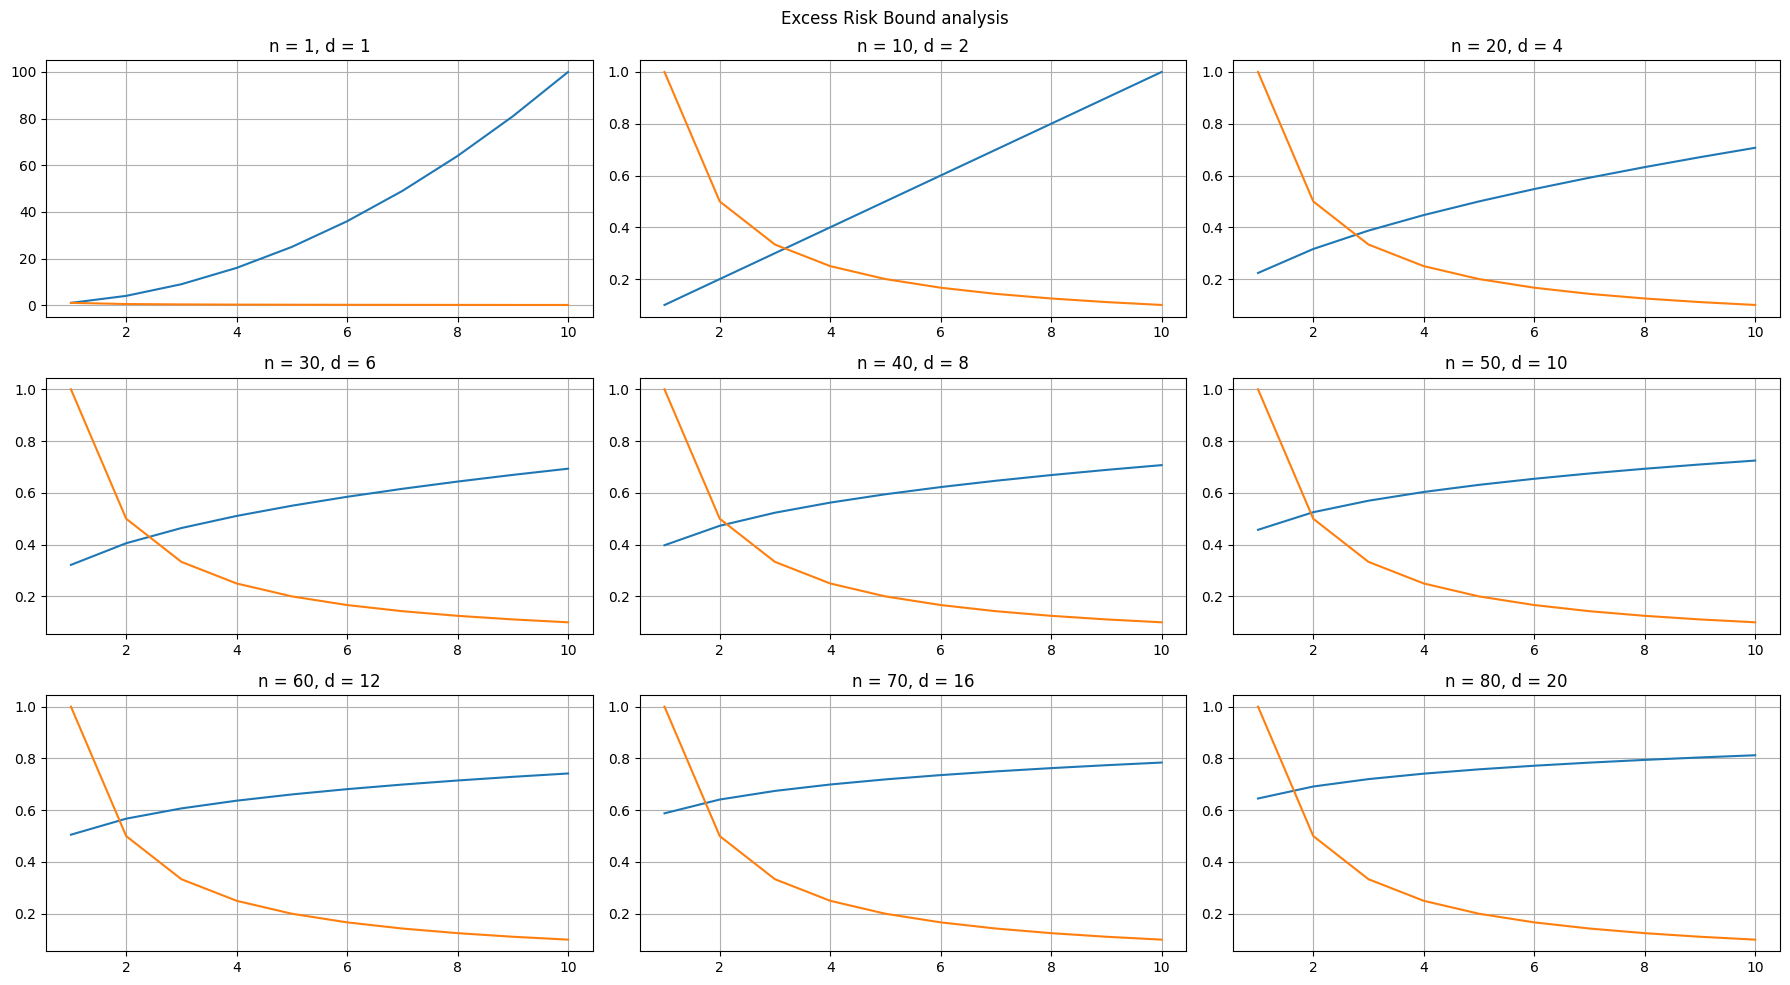

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3,3)
n = [1,10,20,30,40,50,60,70,80]
d = [1,2,4,6,8,10,12,16,20,30]
k = np.linspace(1,10,10)
i = 0

for p in axs :
    for g  in p:
        b_risk = (k/n[i])**(2/d[i])
        v_risk = 1/k
        g.plot(k, b_risk)
        g.plot(k, v_risk)
        g.set_title(f'n = {n[i]}, d = {d[i]}')
        i = i + 1
        g.grid()
fig.suptitle('Excess Risk Bound analysis')
fig.set_size_inches(18, 10)
fig.tight_layout()

$k_*$ increases with $d$ and $n$. The following snippet fixes $(n,d)$ and plots $k_*$ :

Optimal k*=52


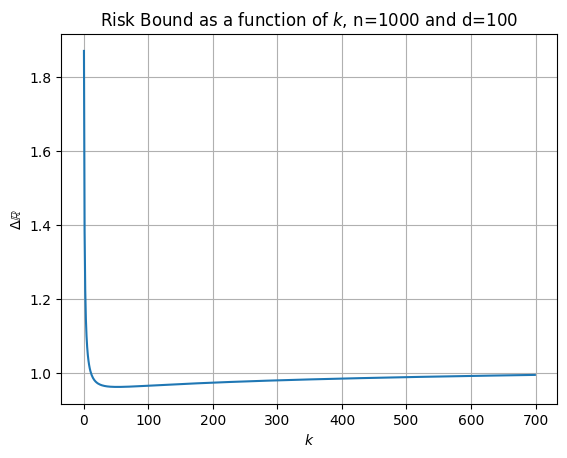

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

def r(n,d,k):
    r1 = (k/n)**(2/d)
    r2 = 1/k
    return r1 + r2

    
min_x = 1
max_x = 700
k = np.linspace(min_x,max_x,700)
d = 100
n = 1000
val = [r(n,d,j) for j in k]

opt = np.argmin(val)
plt.plot(val)
plt.title(f"Risk Bound as a function of $k$, n={n} and d={d}")
plt.ylabel("$\Delta \mathbb{R}$")
plt.xlabel("$k$")
plt.grid()
print(f"Optimal k*={opt}")

## 5)
We want to analitically find the best $k_*(n,d)$. We have that the difference between the expected population risk and the Bayes population risk is bounded as shown in the following expression:

$$
\Delta \mathbb{R} \leq \left(\frac{k}{n}\right)^{\frac{2}{d}} + \frac{1}{k} \leq \left(\frac{k}{n}\right)^{\frac{2}{d}} + 1
$$

$k_*$ would be such that the right term would be as close to zero as possible. In the right side, we have a $k^\frac{2}{d}$ bias term and a $\frac{1}{k}$ variance term. So as we increase k, we minimize the variance and elevate the bias. The optimal $ k_* $ is chosen by cross-validation. However, if $n$ grows faster than $k$, we get that the bias term tends to zero for $\lim_{k\to\inf} k$. 

To find $k_*$, we first set $\Delta\mathbb{R}$ equal to the right side expression, and not less than equal. Then we derive this $\Delta\mathbb{R}$ by k and equal it to zero, as such:

$$
\frac{\partial\Delta\mathbb{R}}{\partial k} = - \frac{d - 2k\frac{k}{n}^{\frac{2}{d}}} {d\cdot k^2} = 0
$$
Which gives us:

$$
\ln(k)\cdot \frac{2+d}{d} = \ln\left(\frac{1}{2}d\cdot n^{\frac{2}{d}}\right)
$$

Which finally gives us the $k_*$ expression we are looking for:

$$
k_*(n,d) = \left( \frac{1}{2}d\cdot n^{\frac{2}{d}} \right)^{\frac{d}{d+2}}
$$


## 6) 

By plugging the $k_*(n,d)$ expression find above into the excess risk bound $\Delta\mathbb{R}$, we get the following:

$$
\Delta\mathbb{R} = \left(\frac{k_*}{n}\right)^{\frac{2}{d}} + \frac{1}{k_*} = \left(\frac{\left( \frac{1}{2}d\cdot n^{\frac{2}{d}} \right)^{\frac{d}{d+2}}}{n}\right)^{\frac{2}{d}} + \frac{1}{\left( \frac{1}{2}d\cdot n^{\frac{2}{d}} \right)^{\frac{d}{d+2}}}
$$


The bound derivative, given by:

$$
\left( \frac{1}{2}d\cdot n^{\frac{2}{d}} \right)^{\frac{d}{d+2}} = \frac{2}{d}\cdot\frac{k}{n}^{\frac{2-d}{d}} - \frac{1}{k^2}
$$

Can be expressed as:

$$
\frac{k_*^{\frac{2}{d}}}{n} = \frac{d}{2k_*}
$$

Which is equal to one of the terms in the bound, leading us to rewrite is as:

$$
\Delta\mathbb{R}_* \leq \frac{d + 2}{2k_*(n,d)} = \frac{d + 2}{2\cdot\left(\frac{d}{2}^{\frac{d}{d + 2}}\cdot n^{\frac{2}{2+d}}\right)}
$$

## 7)

The y values are quite high, specially compared to the $\Delta\mathbb{R}_* = 0.1$ we want to achieve. We can express the number of samples as a function of $d$ and $\Delta\mathbb{R}_* = 0.1$, which gives us the following expression


$$ n(d) = \frac{(d+2)^{\frac{d+2}{2}}}{0.2^{\frac{d+2}{2}}\cdot(\frac{d}{2})^{\frac{d}{2}}}$$

Text(0.5, 0, '$d$')

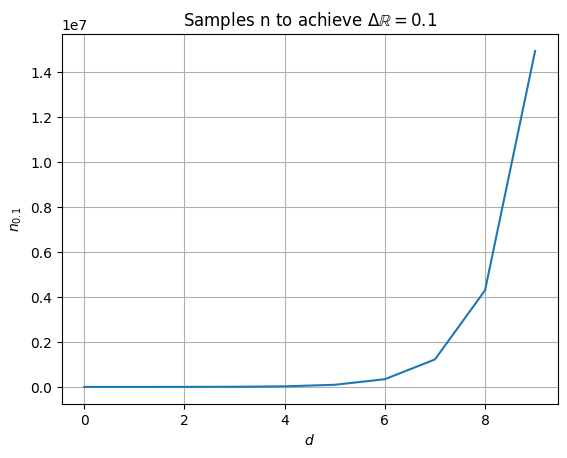

In [ ]:
import numpy as np

def n(d):
    r1 = (5 * (d + 2))**(0.5*(d + 2)) 
    r2 = (d / 2)**(0.5 * d)
    ret = r1/r2
    return ret

min_x = 1 
max_x = 10
d_vals = np.linspace(min_x,max_x,10) 
val = [n(i) for i in d_vals]
plt.plot(val)
plt.grid()
plt.title("Samples n to achieve $\Delta\mathbb{R} = 0.1$")
plt.ylabel("$n_{0.1}$")
plt.xlabel("$d$")